In [1]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

import logging
import numpy as np
import pandas as pd
import math
import numpy as np

Using TensorFlow backend.


In [2]:
#將人工標註結果載入
y_train = []
data_path = r"C:\Users\peihsuan\Downloads\20testing_analysis_CNN\train_text_whole.txt"
df = pd.read_csv(data_path,encoding='big5')  
y_train = df['label']

In [3]:
#自第862筆起，都是作答未含有A的部分，因此皆為0
print(y_train[862:872])

862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
Name: label, dtype: int64


In [4]:
#將學生答案及word embedding載入; word embedding為WIKI corpus以字元為單位計算得出
train_text = []
data_path = r"C:\Users\peihsuan\Downloads\20testing_analysis_CNN\text_embedding.csv"
df = pd.read_csv(data_path,encoding= 'big5',sep = ';') 
train_text = df['text']

In [5]:
print(train_text[862:872])

862    植物
863    自然
864    自然
865    褐色
866    自然
867    棕色
868    堅硬
869    曲線
870    影子
871    棺材
Name: text, dtype: object


In [6]:
#將文字embedding作為其中一項feature儲存
x_train_seq_tmp = []
x_train_seq_tmp = df['embeddings']

In [7]:
#將embedding轉為數字陣列以利訓練
tmp = []
x_train_seq = []
for items in range(0,len(x_train_seq_tmp)):
    tmp=np.fromstring(x_train_seq_tmp[items], dtype=float, sep=',')
    x_train_seq.append(tmp)
    tmp = []

In [8]:
#訓練集包含1700筆資料
print(len(train_text))

1700


In [9]:
#1700筆訓練資料含有1700筆對應的人工標註結果
print(len(y_train))

1700


In [10]:
#每一項作答都以250維的word embedding表示
print(len(x_train_seq[872]))

250


In [11]:
#觀看embedding內容
print((x_train_seq[872]))

[ 0.0167358   0.32378578 -0.12206512  0.14157685  0.29918178 -0.14039293
 -0.05648178 -0.08206047 -0.20844277  0.03411076  0.16942408 -0.16063007
  0.13802258  0.06235021  0.243707   -0.10127981  0.07997448 -0.02740395
  0.09291904  0.09279155  0.04302995 -0.05080377  0.11251055 -0.04393205
  0.0550322  -0.16994816  0.06367439  0.31051888 -0.0170423  -0.11970894
  0.03552399 -0.24983939  0.13912353 -0.12832299 -0.01908268 -0.16642417
  0.04651336 -0.1476863  -0.25862549 -0.16275316  0.15525897 -0.23722823
 -0.04380455  0.01471271  0.08524326  0.30112175 -0.30158166 -0.14922547
 -0.12505956 -0.20322293 -0.01562159  0.26198085  0.10148319 -0.02446998
  0.08523886  0.01558867  0.11279298  0.19272751  0.18557676  0.09709603
  0.07402777  0.05322942 -0.16063442  0.10042018 -0.07590208 -0.19441626
 -0.01569439 -0.00569171 -0.037163   -0.03143425  0.14189027  0.18877137
 -0.17612664  0.15194623  0.2045658   0.01889552 -0.07590176  0.00844098
 -0.02390475  0.28941439  0.09670511  0.19864716 -0

In [12]:
#將訓練資料切分為訓練及測試; data後30筆為測試
#train_size = int(len(train_text) * 0.8)
train_textembedding, test_textembedding = x_train_seq[:1670], x_train_seq[1670:]
y_train_predict, y_test_predict = y_train[:1670],y_train[1670:]

In [13]:
# set parameters:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 250
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

In [14]:
print('Pad sequences (samples x time)')
train_textembedding = sequence.pad_sequences(train_textembedding, maxlen=maxlen)
test_textembedding = sequence.pad_sequences(test_textembedding, maxlen=maxlen)
print('train_textembedding shape:', train_textembedding.shape)
print('test_textembedding shape:', test_textembedding.shape)

Pad sequences (samples x time)
train_textembedding shape: (1670, 400)
test_textembedding shape: (30, 400)


In [15]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 250)          1250000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 250)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          187750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0     

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(np.array(train_textembedding), np.array(y_train_predict),batch_size=50, epochs=20,verbose=2,validation_split=0.2)

Train on 1336 samples, validate on 334 samples
Epoch 1/20
 - 9s - loss: 0.6289 - acc: 0.6901 - val_loss: 0.4224 - val_acc: 0.9910
Epoch 2/20
 - 9s - loss: 0.6242 - acc: 0.6901 - val_loss: 0.4519 - val_acc: 0.9910
Epoch 3/20
 - 9s - loss: 0.6226 - acc: 0.6901 - val_loss: 0.4319 - val_acc: 0.9910
Epoch 4/20
 - 8s - loss: 0.6232 - acc: 0.6901 - val_loss: 0.3693 - val_acc: 0.9910
Epoch 5/20
 - 9s - loss: 0.6244 - acc: 0.6901 - val_loss: 0.4207 - val_acc: 0.9910
Epoch 6/20
 - 9s - loss: 0.6196 - acc: 0.6901 - val_loss: 0.4820 - val_acc: 0.9910
Epoch 7/20
 - 9s - loss: 0.6206 - acc: 0.6901 - val_loss: 0.5392 - val_acc: 0.9910
Epoch 8/20
 - 9s - loss: 0.6242 - acc: 0.6901 - val_loss: 0.3565 - val_acc: 0.9910
Epoch 9/20
 - 9s - loss: 0.6242 - acc: 0.6901 - val_loss: 0.3901 - val_acc: 0.9910
Epoch 10/20
 - 9s - loss: 0.6222 - acc: 0.6901 - val_loss: 0.4099 - val_acc: 0.9910
Epoch 11/20
 - 8s - loss: 0.6210 - acc: 0.6901 - val_loss: 0.4062 - val_acc: 0.9910
Epoch 12/20
 - 8s - loss: 0.6228 - acc

In [18]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


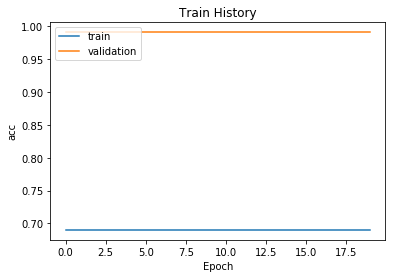

In [19]:
show_train_history(train_history,'acc','val_acc')

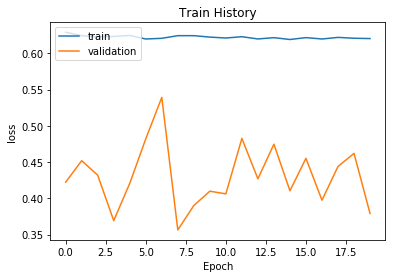

In [20]:
show_train_history(train_history,'loss','val_loss')

In [24]:
#測試準確率
scores = model.evaluate(np.array(test_textembedding), np.array(y_test_predict), verbose=1)
scores[1]

30/30 [==============================] - 0s 2ms/step


0.20000000298023224

In [28]:
prediction=model.predict_classes(test_textembedding)

In [30]:
prediction.shape

(30, 1)

In [32]:
predict_classes=prediction.reshape(30)

In [33]:
SentimentDict={1:'屬於A',0:'不屬於A'}
def display_test_Sentiment(i):
    print(train_text[i+1670])
    print('標籤label:',SentimentDict[y_train[i+1670]],'預測結果:',SentimentDict[predict_classes[i]])

In [34]:
for i in range(0,30):
    display_test_Sentiment(i)
    print("\n")

可觸碰
標籤label: 屬於A 預測結果: 不屬於A


接觸
標籤label: 屬於A 預測結果: 不屬於A


可扭曲
標籤label: 屬於A 預測結果: 不屬於A


可腐敗
標籤label: 屬於A 預測結果: 不屬於A


配件
標籤label: 屬於A 預測結果: 不屬於A


可穿刺
標籤label: 屬於A 預測結果: 不屬於A


可吸水
標籤label: 屬於A 預測結果: 不屬於A


吸水
標籤label: 屬於A 預測結果: 不屬於A


可起火
標籤label: 屬於A 預測結果: 不屬於A


可染色
標籤label: 屬於A 預測結果: 不屬於A


扁平
標籤label: 屬於A 預測結果: 不屬於A


飾品
標籤label: 屬於A 預測結果: 不屬於A


衣衫
標籤label: 屬於A 預測結果: 不屬於A


鬆軟
標籤label: 屬於A 預測結果: 不屬於A


靜物
標籤label: 屬於A 預測結果: 不屬於A


扭轉
標籤label: 屬於A 預測結果: 不屬於A


洗滌
標籤label: 屬於A 預測結果: 不屬於A


好捏
標籤label: 屬於A 預測結果: 不屬於A


耐揉捏
標籤label: 屬於A 預測結果: 不屬於A


強韌
標籤label: 屬於A 預測結果: 不屬於A


縞素
標籤label: 屬於A 預測結果: 不屬於A


冒黴菌
標籤label: 屬於A 預測結果: 不屬於A


高透風
標籤label: 屬於A 預測結果: 不屬於A


勻和
標籤label: 屬於A 預測結果: 不屬於A


耐切割
標籤label: 不屬於A 預測結果: 不屬於A


禁入境
標籤label: 不屬於A 預測結果: 不屬於A


雕刻
標籤label: 不屬於A 預測結果: 不屬於A


黏度高
標籤label: 不屬於A 預測結果: 不屬於A


導電
標籤label: 不屬於A 預測結果: 不屬於A


劇毒
標籤label: 不屬於A 預測結果: 不屬於A


